In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from pdb import set_trace
import glob

In [88]:
data_path_abbr = '/Users/omarschall/blueprint-stats/library/*.csv'
figs_path = '/Users/omarschall/blueprint-stats/figs/'

In [3]:
file_list = glob.glob(data_path_abbr)
file_list

['/Users/omarschall/blueprint-stats/library/Passes vs. Lost  Boys 2019-08-10_00-00-24.csv',
 '/Users/omarschall/blueprint-stats/library/Passes vs. HIP 2019-08-11_10-00-56.csv',
 '/Users/omarschall/blueprint-stats/library/Passes vs. Vault 2019-08-11_14-00-42.csv',
 '/Users/omarschall/blueprint-stats/library/Passes vs. Big Wrench 2019-09-22_12-00-36.csv',
 '/Users/omarschall/blueprint-stats/library/Passes vs. Citywide 2019-08-10_15-00-30.csv',
 '/Users/omarschall/blueprint-stats/library/Passes vs. Shade 2019-09-08_14-00-14.csv',
 '/Users/omarschall/blueprint-stats/library/Passes vs. Red Circus 2019-09-21_14-00-53.csv',
 '/Users/omarschall/blueprint-stats/library/Passes vs. El Nino 2019-08-10_16-00-57.csv',
 '/Users/omarschall/blueprint-stats/library/Passes vs. Floodwall 2019-08-10_09-30-50.csv',
 '/Users/omarschall/blueprint-stats/library/Passes vs. Lantern 2019-09-22_14-38-56.csv']

In [20]:
df = pd.DataFrame()

In [21]:
opponents_list = []
for file in file_list:
    opponent = file.split('vs. ')[1].split(' 2019')[0]
    df_ = pd.read_csv(file)
    df_['opponent'] = opponent
    opponents_list.append(opponent)
    df = df.append(df_)

In [22]:
df = df.dropna(subset={'Thrower', 'Receiver'})

In [23]:
df = df.reset_index()

In [31]:
poss_ids = np.array([df['Point'], df['Possession'], [opponents_list.index(o) for o in df['opponent']]]).T

In [33]:
poss_ids[:4]

array([[1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0]])

In [39]:
assists = np.array(df['Assist?'])
turnovers = np.array(df['Turnover?'])

In [41]:
Q = assists - turnovers

In [51]:
outcomes = []
for i in range(len(Q)-1, -1, -1):
    
    if Q[i] in [-1, 1]:
        outcome = Q[i]
    outcomes.append(outcome)

In [76]:
outcomes = np.array(outcomes)

In [67]:
X = 40*np.array(df['Start X (0 -> 1 = left sideline -> right sideline)'])
Y = 110*np.array(df['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'])

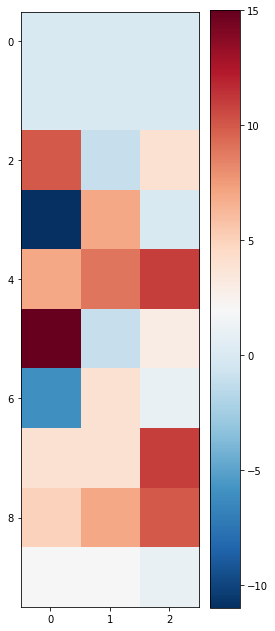

In [91]:
fig = plt.figure(figsize=(4, 11))
bins = [range(0, 40, 10), range(0, 110, 10)]
H1, x_edges, y_edges = np.histogram2d(X[np.where(outcomes==1)], Y[np.where(outcomes==1)], bins=bins)
H2, x_edges, y_edges = np.histogram2d(X[np.where(outcomes==-1)], Y[np.where(outcomes==-1)], bins=bins)
plt.imshow((H1 - H2).T, cmap='RdBu_r')
plt.colorbar()
fig.savefig(os.path.join(figs_path, 'score_turn_diff.pdf'), dpi=300, format='pdf')

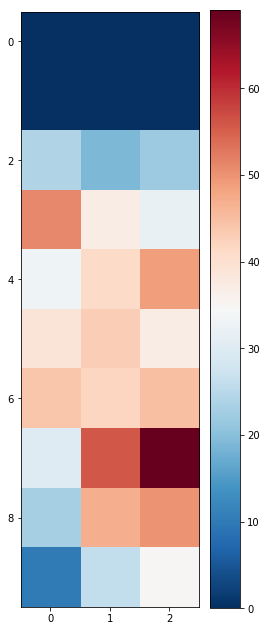

In [92]:
fig = plt.figure(figsize=(4, 11))
plt.imshow((H1 + H2).T, cmap='RdBu_r')
plt.colorbar()
fig.savefig(os.path.join(figs_path, 'total.pdf'), dpi=300, format='pdf')

In [94]:
forward_yardage = np.array(df['Forward distance (m)'])

In [111]:
df_non_turns = df[df['Turnover?'] == 0]
bins = [range(0, 40, 10), range(0, 110, 10)]
forward_yardage = np.array(df_non_turns['Forward distance (m)'])
X = 40*np.array(df_non_turns['Start X (0 -> 1 = left sideline -> right sideline)'])
Y = 110*np.array(df_non_turns['Start Y (0 -> 1 = back of opponent endzone -> back of own endzone)'])
H, x_edges, y_edges = np.histogram2d(X, Y, weights=forward_yardage, bins=bins)

/Users/omarschall/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


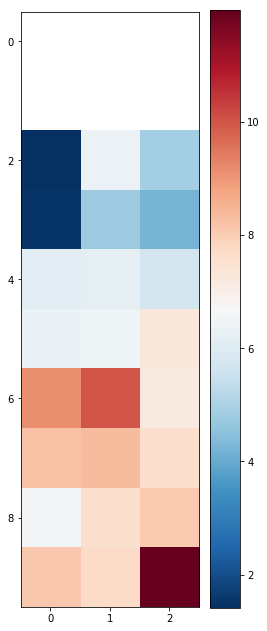

In [116]:
fig = plt.figure(figsize=(4, 11))
plt.imshow(H.T/(H1 + H2).T, cmap='RdBu_r')
plt.colorbar()
fig.savefig(os.path.join(figs_path, 'yardage.pdf'), dpi=300, format='pdf')

In [117]:
H1 + H2

array([[  0.,   0.,  24.,  51.,  33.,  39.,  44.,  30.,  23.,  10.],
       [  0.,   0.,  19.,  37.,  41.,  43.,  42.,  56.,  47.,  26.],
       [  0.,   0.,  22.,  32.,  49.,  37.,  45.,  69.,  50.,  35.]])